<a href="https://colab.research.google.com/github/Soyeon20220610/githubTest/blob/main/C4W1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
All tests passed!


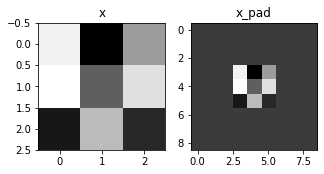

In [6]:
# zero padding
def zero_pad(X,pad):
  X_pad = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),mode='constant',constant_values=(0,0))
  return X_pad

np.random.seed(1)
x=np.random.randn(4,3,3,2)
x_pad=zero_pad(x,3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])
zero_pad_test(zero_pad)

In [9]:
#2. 
def conv_single_step (a_slice_prev,W,b):
    s = a_slice_prev * W
    Z = np.sum(s)
    Z = Z + float(b)
    return Z

np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

print( a_slice_prev * W)
print(np.sum( a_slice_prev * W))

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)
conv_single_step_test(conv_single_step)

assert (type(Z) == np.float64), "You must cast the output to numpy float 64"
assert np.isclose(Z, -6.999089450680221), "Wrong value"

print('b \n',b)

[[[ 0.19517964 -0.37757796 -0.15854148]
  [ 0.37795303 -0.98874397  0.80402579]
  [-0.36448112 -0.44654162  0.26766851]
  [-0.23218928  0.41755949 -1.82351535]]

 [[ 0.24323087 -0.48116947  0.58154416]
  [ 0.32786971 -0.08423431  0.06634126]
  [ 0.04777032  0.88577236 -2.40548621]
  [-1.59860247 -1.30199961 -0.25349124]]

 [[ 0.14417035 -0.5990611  -0.03878845]
  [ 1.89231409  0.0820284   0.43912088]
  [-0.1591475  -0.30233062  0.15277783]
  [ 0.16968185 -0.12522861 -0.00519314]]

 [[-0.22156233  0.02789749 -1.11316672]
  [ 0.280169   -0.02336965 -1.00256263]
  [-0.89578144  0.31336883 -0.01906739]
  [ 0.40686849  0.08085163  0.16243388]]]
-6.655235775109145
Z = -6.999089450680221
All tests passed!
b 
 [[[-0.34385368]]]


In [16]:
def conv_forward(A_prev,W,b,hparameters):
  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
  (f,f,n_C_prev,n_C) = W.shape
  stride=hparameters['stride']
  pad=hparameters['pad']
  n_H= int((n_H_prev-f+2*pad)/stride+1)
  n_W= int((n_W_prev-f+2*pad)/stride+1)
  Z = np.zeros((m,n_H,n_W,n_C))     # output
  A_prev_pad = zero_pad(A_prev,pad)
  for i in range(m):
    for h in range(n_H):
      for w in range(n_W):
        for c in range(n_C):
          vert_start=stride*h
          vert_end=vert_start+f
          horiz_start=stride*w
          horiz_end=horiz_start+f
          a_slice_pad=A_prev_pad[i,vert_start:vert_end,horiz_start:horiz_end,:]
          Z[i,h,w,c] = conv_single_step(a_slice_pad,W[:,:,:,c],b[:,:,:,c])     # W,b 는 왜 이렇게 모양을 바꾸는가?
  cache=(A_prev,W,b,hparameters)
  print(n_H,n_W)
  return Z,cache        

np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)

conv_forward_test_1(z_mean, z_0_2_1, cache_0_1_2_3)
conv_forward_test_2(conv_forward)

               
  

3 4
Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]
First Test: All tests passed!
9 11
2 3
13 15
Second Test: All tests passed!


In [23]:
def pool_forward(A_prev,hparameters,mode='max'):
  (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
  f = hparameters["f"]
  stride = hparameters["stride"]

  n_H = int(1 + (n_H_prev - f) / stride)
  n_W = int(1 + (n_W_prev - f) / stride)
  n_C = n_C_prev

  A = np.zeros((m, n_H, n_W, n_C))   #output

  for i in range(m):
    for h in range(n_H):
      vert_start=h*stride
      vert_end=vert_start+f
      for w in range(n_W):
        horiz_start=w*stride
        horiz_end=horiz_start+f
        for c in range(n_C):
          a_prev_slice = A_prev[i,vert_start:vert_end,horiz_start:horiz_end,c]
          if mode == 'max':
            A[i,h,w,c] = np.max(a_prev_slice)
          if mode == 'average':
            A[i,h,w,c] = np.mean(a_prev_slice)
  cache = (A_prev,hparameters)
  assert(A.shape==(m,n_H,n_W,n_C))
  return A, cache


# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])

pool_forward_test(pool_forward)



mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
All tests passed!


In [24]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
